In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Iris dataset

The iris dataset is one of the most popular dataset in machine learning community. You can get the dataset and description at https://archive.ics.uci.edu/ml/datasets/iris.

The following picture shows the types of iris and what petals and sepals are. (Source: Datacamp)

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

## Reading dataset and bookkeepings

In [2]:
# since we do not have column names, we have to provide them manually
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('iris.data.csv', names=column_names)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
lookup_iris = dict(enumerate(iris['class'].unique()))
lookup_iris

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [4]:
inverse_lookup_iris = {v: k for k, v in lookup_iris.items()}
inverse_lookup_iris

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [5]:
iris['label'] = iris['class'].apply(lambda v: inverse_lookup_iris[v])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [6]:
X = iris[column_names[:-1]]
y = iris['label']
print('X', '-'*60, X.head(), sep='\n')
print('y', '-'*6, y.head(), sep='\n')

X
------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
y
------
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


### Alternate way of reading data from `sklearn`

`sklearn` includes iris dataset! We the following code, you can read X's and y's (in ndarray).

In [7]:
from sklearn import datasets
iris_dataset = datasets.load_iris()
X = iris_dataset.data
y = iris_dataset.target
print('X', '-'*60, X[:5], sep='\n')
print('y', '-'*6, y[:5], sep='\n')

X
------------------------------------------------------------
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
y
------
[0 0 0 0 0]


Now you can make DataFrame from ndarray.

In [8]:
X = pd.DataFrame(X, columns=column_names[:-1])
y = pd.Series(y)
print('X', '-'*60, X.head(), sep='\n')
print('y', '-'*6, y.head(), sep='\n')

X
------------------------------------------------------------
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
y
------
0    0
1    0
2    0
3    0
4    0
dtype: int64


## Examining the data

### Scatter plot matrix (or pair plot)

<IPython.core.display.Javascript object>


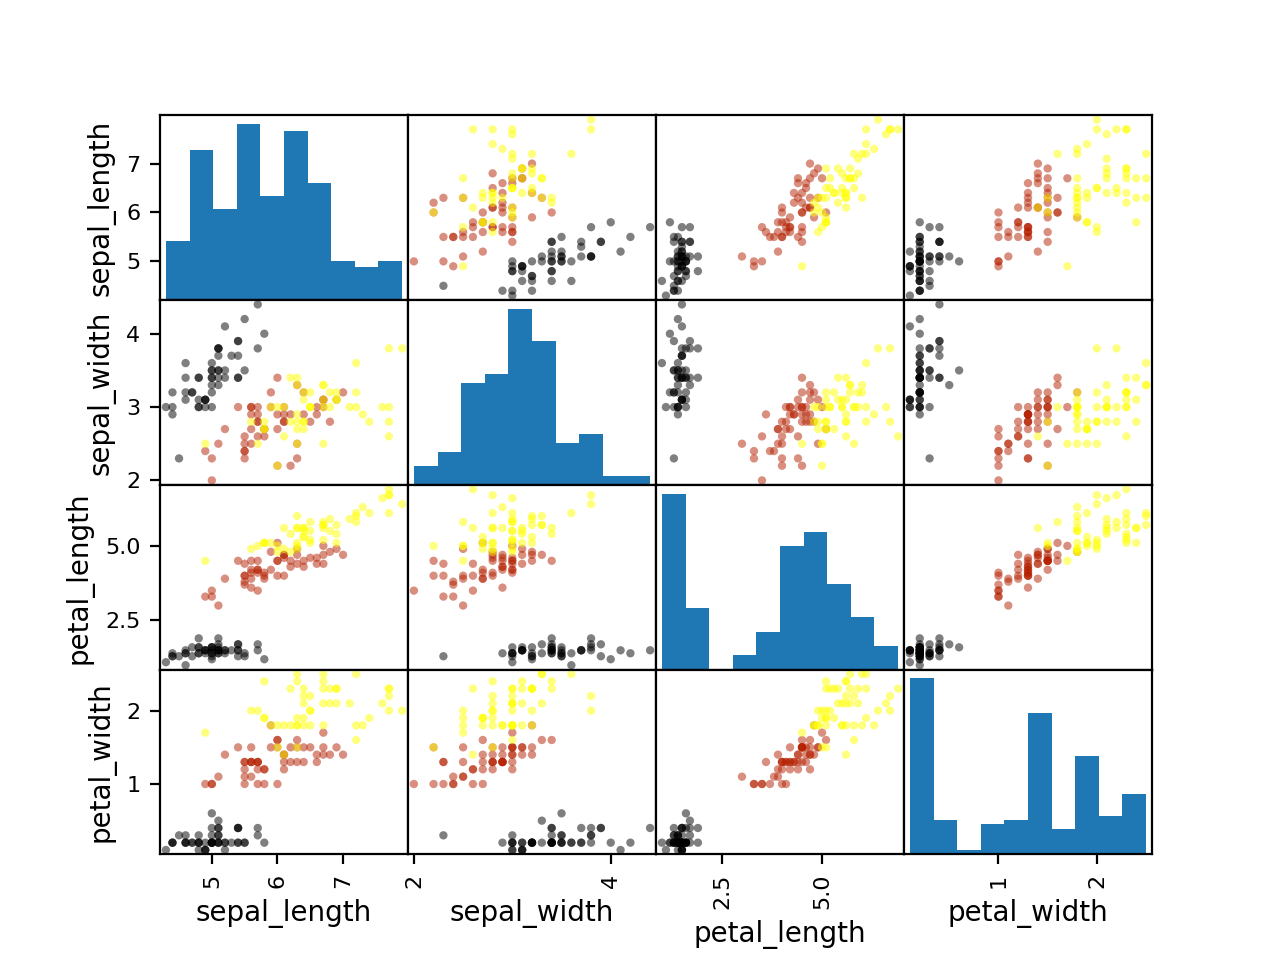

In [9]:
from matplotlib import cm
# gnuplot's traditional pm3d scheme (black-blue-red-yellow)
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c=y, cmap=cmap)

<IPython.core.display.Javascript object>


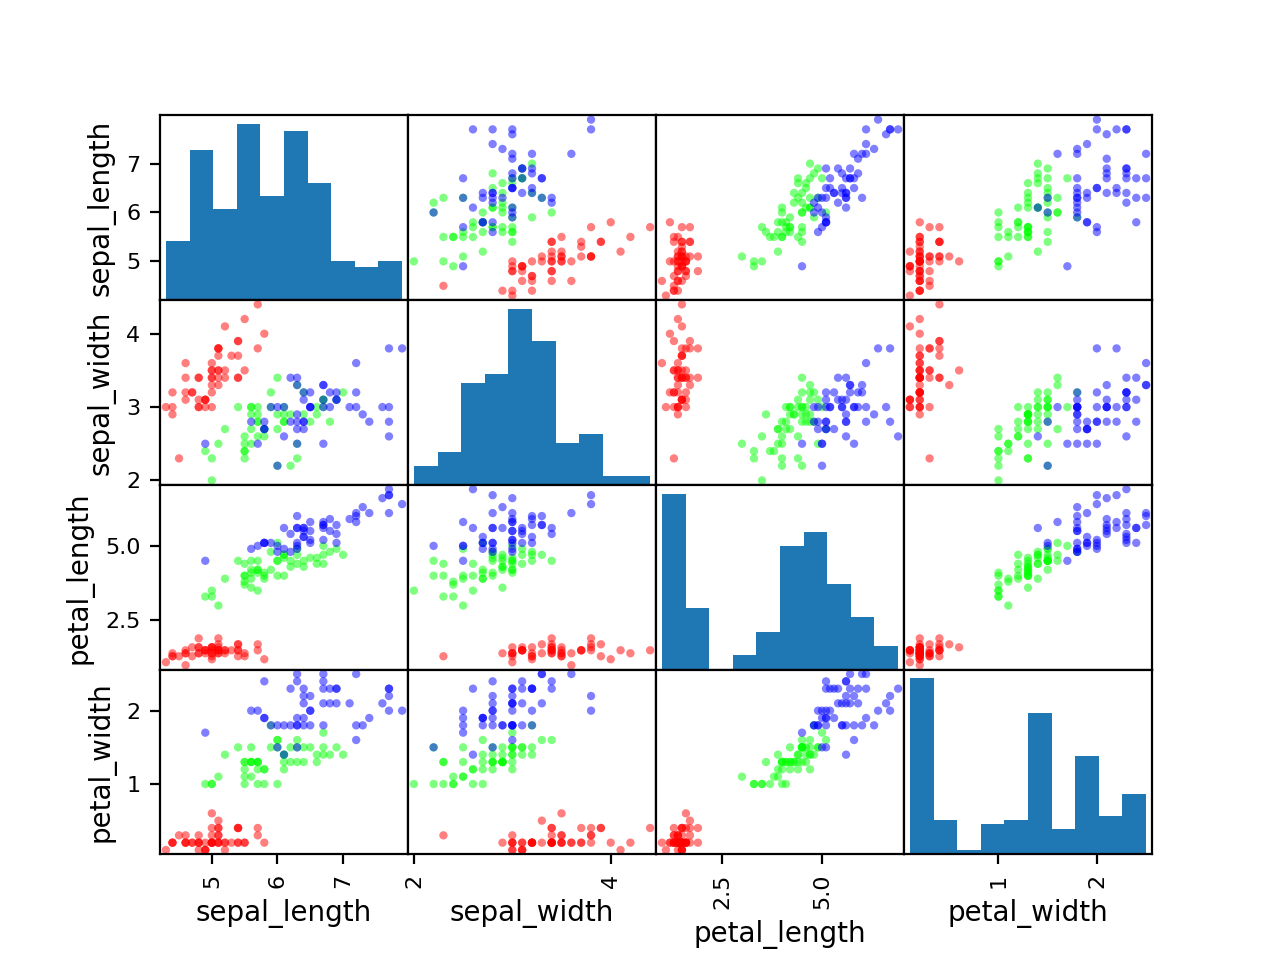

In [10]:
from matplotlib.colors import ListedColormap
# manually specify a color map: red, green, blue
cmap2 = ListedColormap(['#ff0000', '#00ff00', '#0000ff'])
scatter = pd.plotting.scatter_matrix(X, c=y, cmap=cmap2)

### 3D scatter plots

<IPython.core.display.Javascript object>


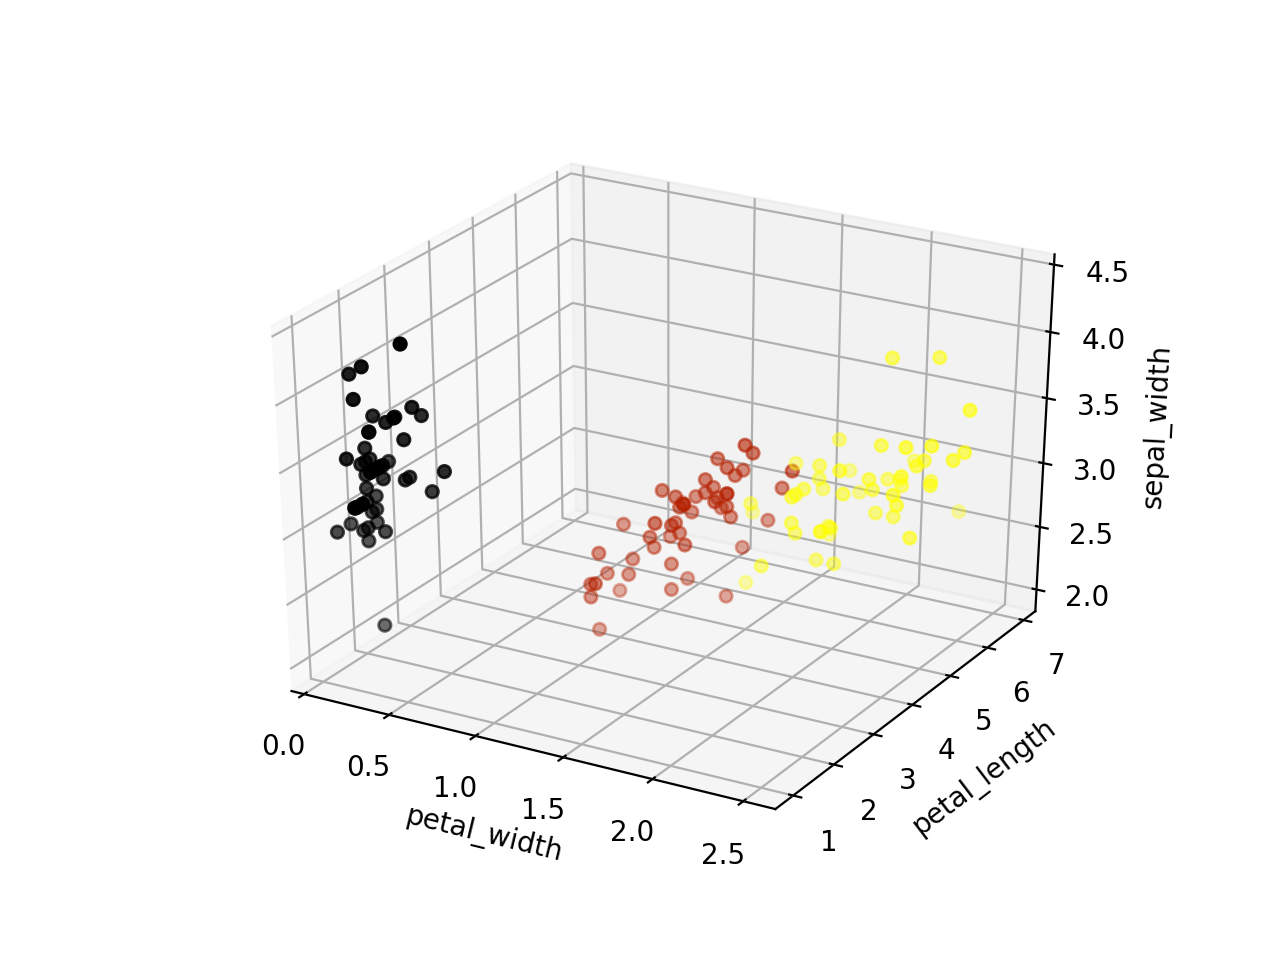

In [11]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['petal_width'], X['petal_length'], X['sepal_width'], c=y, marker='o', cmap=cmap)
ax.set_xlabel('petal_width')
ax.set_ylabel('petal_length')
ax.set_zlabel('sepal_width')
plt.show()

### Correlation

In [12]:
corr = X.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<IPython.core.display.Javascript object>


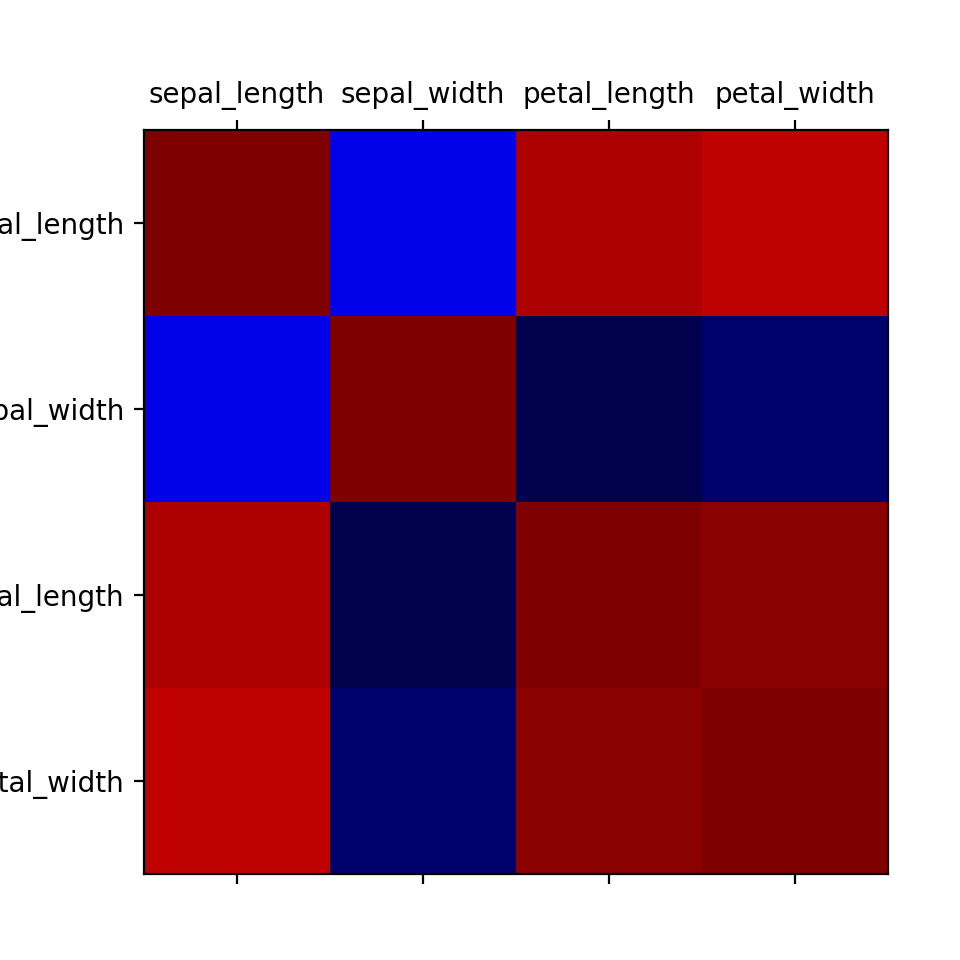

In [13]:
# heatmap
cmap = cm.get_cmap('seismic')
plt.matshow(corr, cmap=cmap)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [14]:
# heatmap with numbers
(corr.style.background_gradient(cmap=cmap)
     .set_properties(**{'color': '#ffffff'})
)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1,0.962757
petal_width,0.817954,-0.356544,0.962757,1


<IPython.core.display.Javascript object>


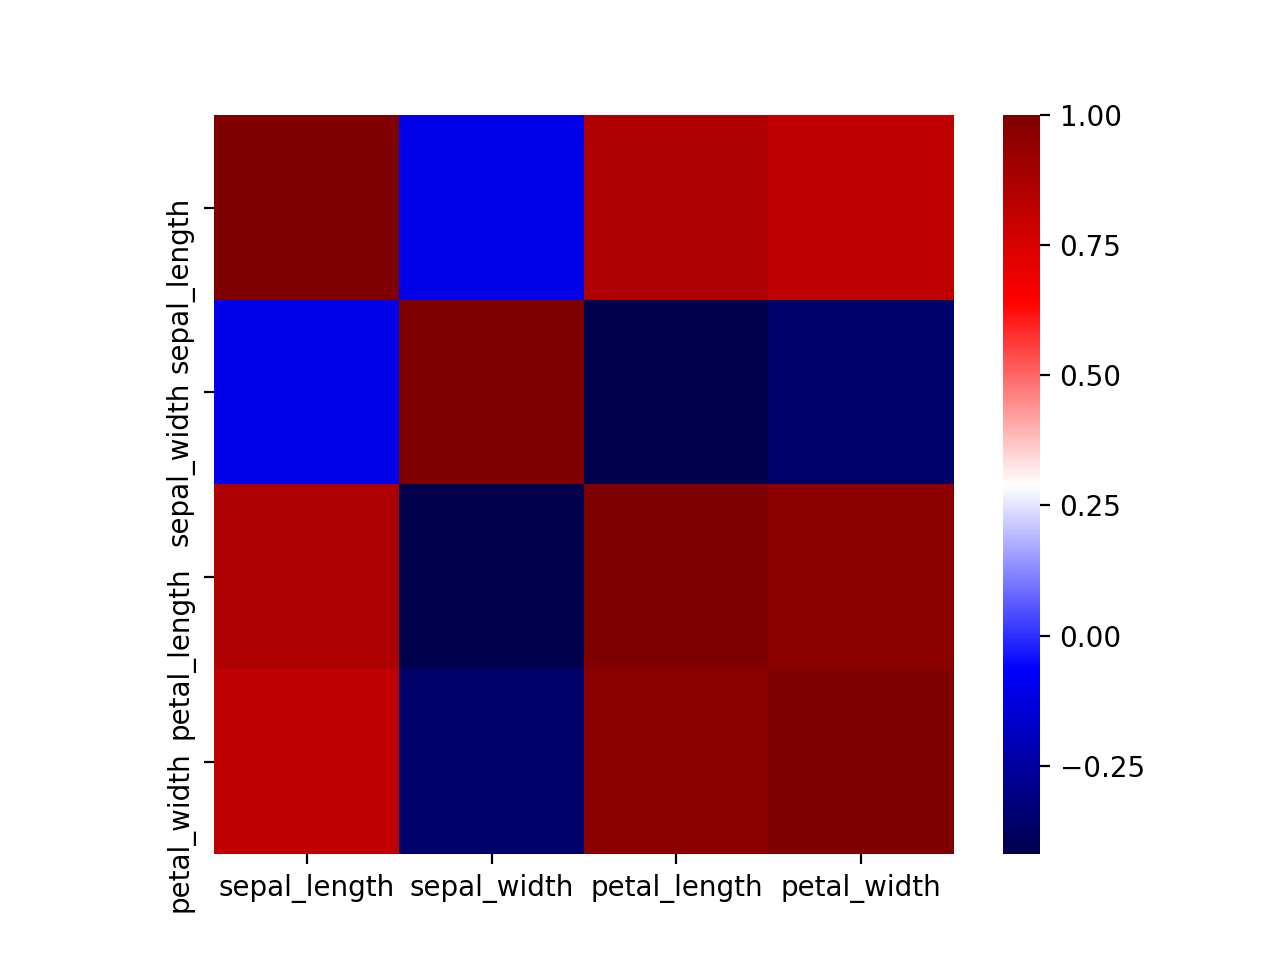

In [15]:
# seaborn provides easy-to-use visualization tools
import seaborn as sns

f, ax = plt.subplots()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=cmap, square=True, ax=ax)